In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/data_science_job.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [4]:
df.shape

(19158, 13)

In [5]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


# **Find out which column missing value ratio less than 5%**

In [7]:
cols = [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [8]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
13902,0.698,Part time course,Graduate,7.0,306.0
18811,0.624,no_enrollment,Graduate,4.0,13.0
15080,0.924,no_enrollment,Masters,20.0,162.0
1380,0.920,no_enrollment,Graduate,6.0,246.0
12143,0.763,no_enrollment,Graduate,12.0,288.0


# **After remove Missing data what % are impact in the dataset**

In [9]:
len(df[cols].dropna())/len(df)

0.8968577095730244

# **Now remove Missing data**

In [12]:
new_df = df[cols].dropna()
new_df.shape,df.shape

((17182, 5), (19158, 13))

In [32]:
df['enrolled_university'].value_counts()

,count
enrolled_university,
no_enrollment,13817
Full time course,3757
Part time course,1198


# **Now check plot the numeric column and compare**

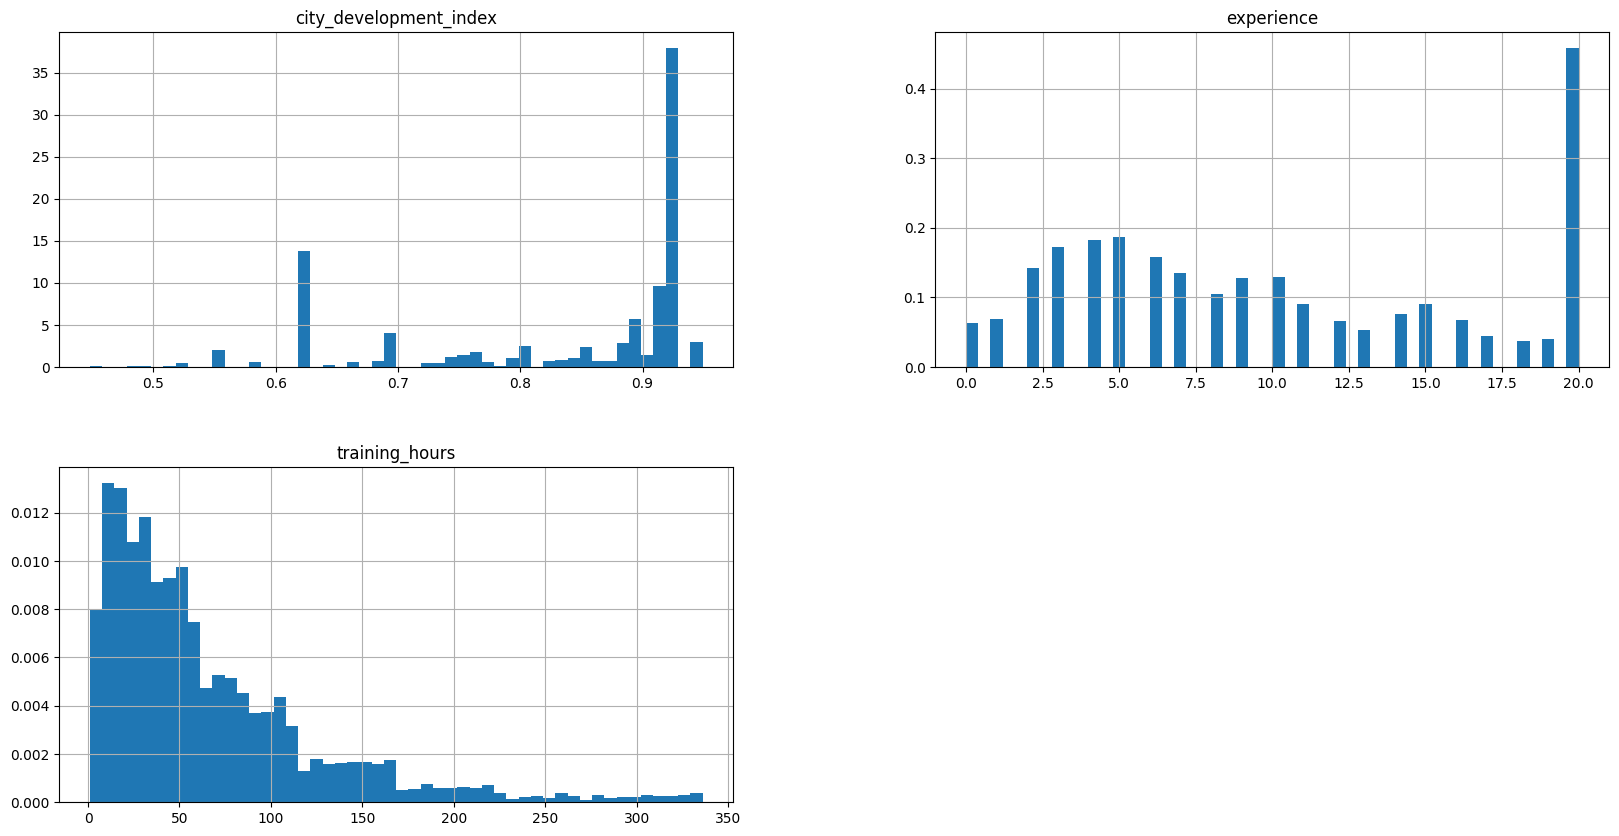

In [14]:
new_df.hist(bins = 50,density = True,figsize = (20,10))
plt.show()

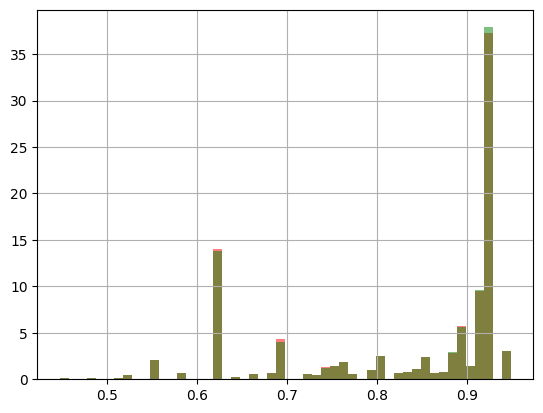

In [16]:
fig = plt.figure()
ax =fig.add_subplot(111)
#original Data
df['city_development_index'].hist(bins = 50,ax = ax,density = True,alpha = 0.5,color='red')
#New Data after cca
new_df['city_development_index'].hist(bins = 50,ax = ax,color ='green',density = True,alpha = 0.5)
plt.show()

# **Using PDA on this column**

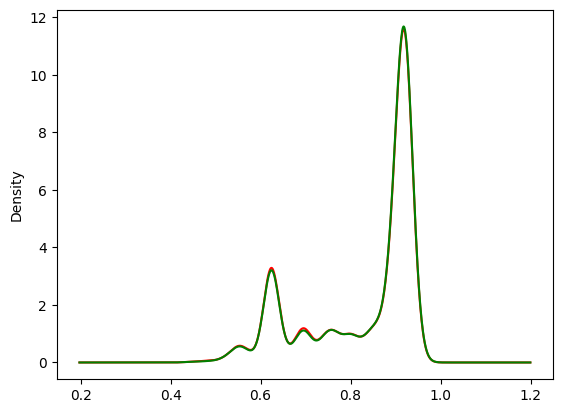

In [19]:
fig = plt.figure()
ax =fig.add_subplot(111)
#Original data
df['city_development_index'].plot.density(color ='red')
#data after cca
new_df['city_development_index'].plot.density(color ='green')
plt.show()

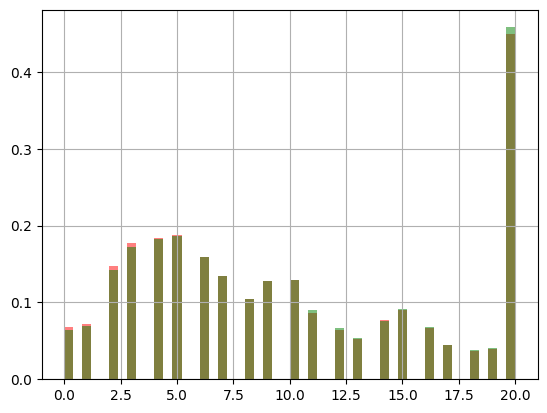

In [17]:
fig = plt.figure()
ax =fig.add_subplot(111)
#original Data
df['experience'].hist(bins = 50,ax = ax,density = True,alpha = 0.5,color='red')
#New Data after cca
new_df['experience'].hist(bins = 50,ax = ax,color ='green',density = True,alpha = 0.5)
plt.show()

# **using PDA**

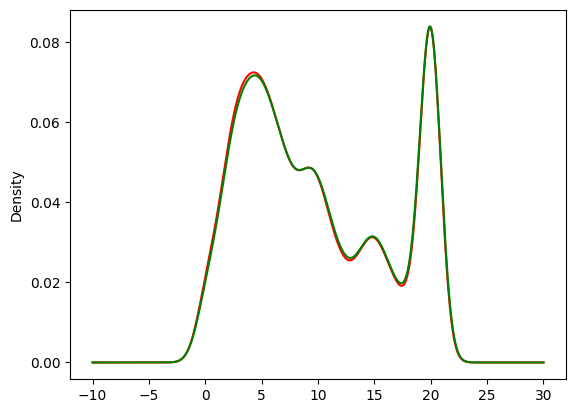

In [20]:
fig = plt.figure()
ax =fig.add_subplot(111)
#Original data
df['experience'].plot.density(color ='red')
#data after cca
new_df['experience'].plot.density(color ='green')
plt.show()

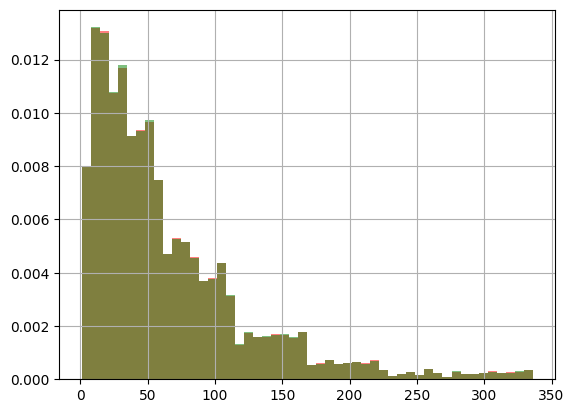

In [18]:
fig = plt.figure()
ax =fig.add_subplot(111)
#original Data
df['training_hours'].hist(bins = 50,ax = ax,density = True,alpha = 0.5,color='red')
#New Data after cca
new_df['training_hours'].hist(bins = 50,ax = ax,color ='green',density = True,alpha = 0.5)
plt.show()

# **Using PDA**

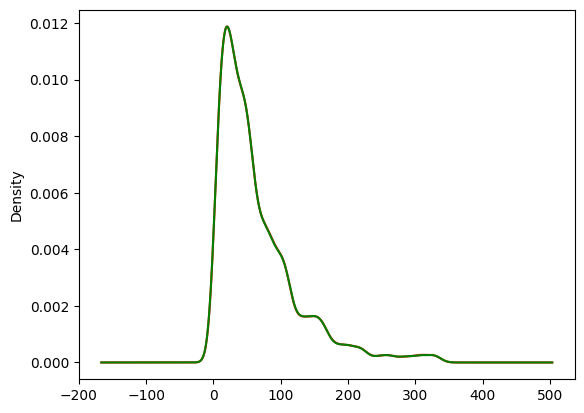

In [21]:
fig = plt.figure()
ax =fig.add_subplot(111)
#Original data
df['training_hours'].plot.density(color ='red')
#data after cca
new_df['training_hours'].plot.density(color ='green')
plt.show()

# **Now check plot on categorical column and PDA**

In [24]:
temp = pd.concat([
    #percentage of observations per category,original data
    df['enrolled_university'].value_counts(normalize = True)/len(df),
    #percentage of observations per category,cca data
    new_df['enrolled_university'].value_counts(normalize = True)/len(new_df)
],axis = 1)

In [25]:
#add column namess
temp.columns = ['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [26]:
temp = pd.concat([
    #percentage of observations per category,original data
    df['education_level'].value_counts(normalize = True)/len(df),
    #percentage of observations per category,cca data
    new_df['education_level'].value_counts(normalize = True)/len(new_df)
],axis = 1)

In [27]:
#add column namess
temp.columns = ['original','cca']
temp

,original,cca
education_level,,
Graduate,3.237709e-05,3.607465e-05
Masters,1.217421e-05,1.362369e-05
High School,5.630676e-06,6.249553e-06
Phd,1.155726e-06,1.287171e-06
Primary School,8.598157e-07,9.653781e-07
